### Seaborn 라이브러리

- seaborn은 matplotlib의 상위 호환 데이터 시각화를 위한 라이브러리
- matplotlib을 기반으로 하는 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지
- matplotlib와는 다르게 seaborn 라이브러리가 매력적인 이유는 바로 통계와 관련된 차트
- 데이터프레임으로 다양한 통계 지표를 낼 수 있는 시각화 차트를 제공하기 때문에 데이터 분석에 활발히 사용되고 있는 라이브러리
- 기본적인 시각화 기능은 matplotlib 패키지에 의존하며 통계 기능은 Statsmodels 패키지에 의존

### 한국 복지 패널 데이터 개요

- 한국 보건 사회 연구원에서 가구의 경제 활동을 연구해 정책 지원에 반영할 목적으로 발간하는 조사 자료

### welfare_python 데이터 설명

- gender : 성별 [남, 여]
- birth : 생일 [태어난 년도]
- marriage : [혼인 상태] ; \
  0.비해당{18세 미만}, 1.유배우, 2.사별, 3.이혼, 4.별거, 5.미혼{18세이상, 미혼모 포함}, 6.기타{사망 등}
- code_job : 직업 코드
- code_religion : 7개 권역별 지역 구분 ; \
  1.서울 2.수도권{인천/경기} 3.부산/경남/울산 4.대구/경북 5.대전/충남 6.강원/충북 7.광주/전남/전북/제주도
- religion : 종교 유무 ; \
  1.있음 2.없음
- income : 소득{월 평균 임금}

### welfare_job 데이터 설명

- code_job : 직업 코드
- job : 직업의 이름

In [75]:
# 경고 메세지 안보이게 하기
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [76]:
# 시각화를 위한 모듈 및 관련 파라미터 설정
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rcParams["font.size"] = 12
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.
plt.rcParams['axes.unicode_minus'] = False

### 데이터 불러오기

In [77]:
CHART_NAME = 'seabornWelfare'
cnt, PNG, UNDERBAR = 0, '.png', '_'
filename = './data/welfare_python.csv'

In [78]:
import pandas as pd
welfare = pd.read_csv(filename, encoding='utf-8')

print(welfare.columns)

Index(['gender', 'birth', 'marriage', 'religion', 'code_job', 'income',
       'code_religion'],
      dtype='object')


### 데이터 전처리

In [79]:
# 성별을 나타내는 'gender' 컬럼에 숫자 값을 문자열 값으로 치환
# 나이 컬럼은 생일 컬럼을 기반으로 산술 연산을 수행하여 신규로 만듦
welfare.loc[welfare['gender'] == 1 , ['gender']] = '남성'
welfare.loc[welfare['gender'] == 2 , ['gender']] = '여성'

print('\n# 나이 컬럼은 존재하지 않으므로 생일 컬럼을 이용하여 산술 연산합니다.')
thisyear = 2020
welfare['age'] = thisyear - welfare['birth'] + 1


# 나이 컬럼은 존재하지 않으므로 생일 컬럼을 이용하여 산술 연산합니다.


In [80]:
# 결혼 칼럼 'marriage'은 apply() 함수를 적용하여 적절한 문자열로 변경
# 값이 1이면 '결혼', 3이면 '이혼', 이외에는 '무응답'
def setMarriage( x ):
    if x == 1 :
        return '결혼'
    elif x == 3 :
        return '이혼'
    else :
        return '무응답' # 결측치
    
welfare['marriage'] = welfare['marriage'].apply(setMarriage)

In [81]:
# 월급이 존재하지 않는 사람이 몇명인지 파악
# 결측치에 대하여 비결측치의 평균 값을 적용

print('\n# 월급 결측치 개수 구하기 before')
print(sum(welfare['income'].isnull()))

welfare.loc[welfare['income'].isnull(), 'income'] = welfare['income'].mean()

print('\n# 월급 결측치 개수 구하기 after')
print(sum(welfare['income'].isnull()))


# 월급 결측치 개수 구하기 before
12030

# 월급 결측치 개수 구하기 after
0


In [82]:
# apply() 함수를 사용하여 종교 컬럼 'religion'에 대하여 수치 값을 문자열 값으로 변경
# religion 의 값이 1이면 종교 있음

def setReligion_txt( x ):
    if int(x) == 1 :
        return '있음'
    else :
        return '없음'

print("welfare['religion'].unique()")
print(welfare['religion'].unique())


welfare['religion'] = welfare['religion'].apply(setReligion_txt)

welfare['religion'].unique()
[2 1]


In [83]:
# 직업 코드 정보를 저장하고 있는 파일을 불러옴.

job_file = './data/welfare_job.csv'
jobframe = pd.read_csv(job_file, encoding='cp949')

print("welfare['code_job'].unique()")
print(welfare['code_job'].unique())

welfare['code_job'].unique()
[  nan  942.  762.  530.  999.  312.  254.  510.  286.  521.  773.  314.
  941.  951.  274.  873.  320.  952.  151.  152.  772.  852.  442.  991.
  422.  313.  710.  522.  399.  753.  851.  235.  231.  311.  721.  953.
  930.  863.  910.  392.  761.  922.  285.  875.  862.  421.  243.  223.
  252.  259.  771.  135.  245.  221.  751.  251.  141.  722.  246.  289.
  281.  741.  261.  247.  441.  864.  222.  411.  799.  743.  780.  149.
  891.  823.  159.  248.  874.  892.  241.  239.  791.  271.  871.  391.
  620.  131.  431.  811.  272.  429.  213.  842.  283.  284.  134.  611.
  236.  792.  855.  234.  861.  921.  253.  752.  841.  330.  233.  899.
  139.  432.  212.  423.  730.  273.  211.  412.  120.  992.  854.  822.
  831.  853.  832.  612.  821.  613.  774.  132. 1011.  237.  153.  133.
  224.  882.  242.  244.  232.  630.  742.  843. 1012.  881.  812.  819.
  111.  876.]


In [84]:
# 복지 관련 데이터 프레임 welfare에는 직업에 대한 이름 정보가 존재하지 않음.
# 대신에 jobframe이라는 데이터 프레임에 해당 정보가 있음.
# merge() 함수를 사용하여 양쪽 데이터 프레임 정보를 합침

print('\n# merge() 함수의 left_on과 right_on 사용하기')
welfare = pd.merge( welfare, jobframe, left_on='code_job', right_on='code_job')
print(welfare)


# merge() 함수의 left_on과 right_on 사용하기
     gender  birth marriage religion  code_job       income  code_religion  \
0        남성   1948      무응답       없음     942.0   120.000000              1   
1        남성   1945       이혼       없음     942.0   220.200000              1   
2        남성   1946       결혼       없음     942.0   139.000000              1   
3        남성   1953       결혼       없음     942.0   150.000000              1   
4        남성   1960       결혼       있음     942.0   166.000000              1   
...     ...    ...      ...      ...       ...          ...            ...   
7524     여성   1950       결혼       있음     819.0   241.619016              6   
7525     남성   1960       결혼       있음     111.0   250.000000              7   
7526     남성   1960       결혼       없음     111.0  1250.000000              1   
7527     남성   1992      무응답       있음     876.0   280.000000              3   
7528     남성   1935       결혼       있음     876.0   156.000000              3   

      age                

In [85]:
# 권역별 지역 정보 컬럼 'code_religion' 정보를 확인

print("welfare['code_religion'].unique()")
print(welfare['code_religion'].unique()) # 총 7개

welfare['code_religion'].unique()
[1 2 3 4 7 5 6]


In [86]:
# apply() 함수와 setReligion_txt 함수를 사용하여 문자열 데이터로 변경

def setReligion_txt( x ):
    if int(x) == 1 :
        return '서울'
    elif int(x) == 2 :
        return '수도권'
    elif int(x) == 3:
        return '부산/경남/울산'
    elif int(x) == 4 :
        return '대구/경북'
    elif int(x) == 5 :
        return '대전/충남'
    elif int(x) == 6 :
        return '강원/충북'
    elif int(x) == 7 :
        return '광주/전남/전북/제주도'
    
welfare['code_religion'] = welfare['code_religion'].apply(setReligion_txt)

In [87]:
# 연령대를 다음과 같이 분류
# '청년' : 30세 미만, '중년' : 30세 이상, '노년' : 60세 이상

def newAge(x):
    if x < 30:
        return '청년'
    elif x >= 30 and x < 60:
        return '중년'
    else :
        return '노년'
    
welfare['ageg'] = welfare['age'].apply(newAge)

print(welfare[['age', 'ageg']].head())

   age ageg
0   73   노년
1   76   노년
2   75   노년
3   68   노년
4   61   노년


In [88]:
# 모든 컬럼들이 영문으로 되어 있어 '한글' 이름으로 컬럼을 변경

col_mapping = {'gender':'성별', 'birth':'생일', 'marriage':'결혼 유무', 'religion':'종교 유무', 'code_job':'직업 코드', 'income':'소득', 'code_religion':'지역구', 'age':'나이', 'job':'직업', 'ageg':'연령대'}
welfare = welfare.rename(columns = col_mapping)

welfare.to_csv('./data/welfareClean.csv', index=False, encoding='cp949')

In [89]:
# 전처리된 데이터 불러오기

print(welfare.columns)

print(welfare.head(10))

Index(['성별', '생일', '결혼 유무', '종교 유무', '직업 코드', '소득', '지역구', '나이', '직업', '연령대'], dtype='object')
   성별    생일 결혼 유무 종교 유무  직업 코드          소득  지역구  나이         직업 연령대
0  남성  1948   무응답    없음  942.0  120.000000   서울  73  경비원 및 검표원  노년
1  남성  1945    이혼    없음  942.0  220.200000   서울  76  경비원 및 검표원  노년
2  남성  1946    결혼    없음  942.0  139.000000   서울  75  경비원 및 검표원  노년
3  남성  1953    결혼    없음  942.0  150.000000   서울  68  경비원 및 검표원  노년
4  남성  1960    결혼    있음  942.0  166.000000   서울  61  경비원 및 검표원  노년
5  남성  1939    결혼    있음  942.0  241.619016   서울  82  경비원 및 검표원  노년
6  남성  1947    결혼    있음  942.0  150.000000  수도권  74  경비원 및 검표원  노년
7  남성  1952    이혼    없음  942.0  170.000000   서울  69  경비원 및 검표원  노년
8  남성  1949    결혼    있음  942.0  100.000000   서울  72  경비원 및 검표원  노년
9  남성  1942    결혼    있음  942.0  120.000000   서울  79  경비원 및 검표원  노년


In [90]:
# 통계정보 확인
print(welfare.describe())

                생일        직업 코드           소득           나이
count  7529.000000  7529.000000  7529.000000  7529.000000
mean   1964.012087   591.243724   241.619016    56.987913
std      15.524029   255.793317   144.679991    15.524029
min    1919.000000   111.000000     0.000000    23.000000
25%    1952.000000   314.000000   162.600000    45.000000
50%    1965.000000   611.000000   241.619016    56.000000
75%    1976.000000   863.000000   241.619016    69.000000
max    1998.000000  1012.000000  2400.000000   102.000000


In [ ]:
# 각 컬럼의 unique한 값 확인

print(welfare['결혼 유무'].unique())

print(welfare['종교 유무'].unique())

print(welfare['지역구'].unique())

print(welfare['직업'].unique())

print(welfare['연령대'].unique())

In [92]:
# 그래프에 대하여 이미지 파일로 저장해주는 함수

def FileSave():
    global cnt # 변수 cnt 값이 하나씩 증가하면서 새로운 이미지 파일 생성
    cnt += 1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
    plt.savefig(savefile, dpi=400)
    print(savefile + ' 파일이 저장되었습니다.')
# end def FileSave():

### 결혼 유무와 종교 유무에 따른 빈도 (countplot)

- countplot() 함수는 범주형 데이터에 대하여 항목별 개수를 세어서 막대그래프를 그려줌
- 매개변수 \
  x : 데이터프레임의 열 이름 문자열을 지정 \
  data : 대상이 되는 데이터프레임 지정 \
  hue : 특성을 구분할 컬럼을 지정 \
  order : 열거할 데이터의 순서를 사용자가 정의하고자 할때 사용 \
  linewidth : 테두리 선의 두께를 지정 \
  edgecolor : Bar의 테두리(edge) 색상을 지정 \
  palette : 색상 팔레트 지정

In [93]:
# '결혼 유무'에 대한 빈도 수를 이용하여 countplot 함수 사용

print('결혼 유무 빈도')
result = welfare.groupby('결혼 유무')['결혼 유무'].count()
print(result)

결혼 유무 빈도
결혼 유무
결혼     5307
무응답    1803
이혼      419
Name: 결혼 유무, dtype: int64


seabornWelfare_01.png 파일이 저장되었습니다.


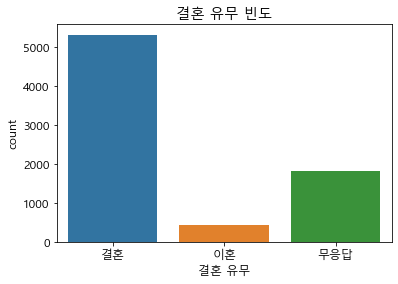

In [94]:
ORDERING = ['결혼', '이혼', '무응답']
plt.figure()
plt.title('결혼 유무 빈도')

import seaborn as sns
sns.countplot(x='결혼 유무', data=welfare, order=ORDERING)
FileSave()

In [95]:
# '결혼 유무' 및 '종교 유무' 컬럼과 관련 빈도 수를 구함

print('결혼 유무 vs 종교 유무 빈도')
result = welfare.groupby(['결혼 유무', '종교 유무'])['결혼 유무'].count()
print(result)

결혼 유무 vs 종교 유무 빈도
결혼 유무  종교 유무
결혼     없음       2778
       있음       2529
무응답    없음        932
       있음        871
이혼     없음        247
       있음        172
Name: 결혼 유무, dtype: int64


- 예를 들어, '기혼자' 중에 종교가 '있음'인 사람은 2529명

seabornWelfare_02.png 파일이 저장되었습니다.


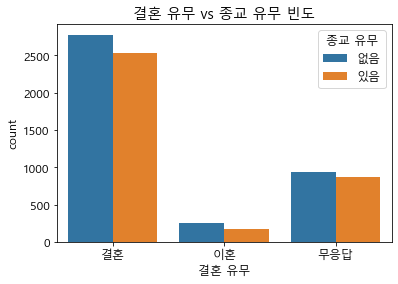

In [96]:
# '결혼 유무'를 그룹으로 나눈 다음 hue 매개 변수를 이용하여 '종교 유무' 컬럼에 대한 하위 세부 그룹 분류

plt.figure()
plt.title('결혼 유무 vs 종교 유무 빈도')
sns.countplot(x='결혼 유무', hue='종교 유무', data=welfare, order=ORDERING)
FileSave()

<AxesSubplot:title={'center':'막대 테두리에 색상 넣기'}, xlabel='결혼 유무', ylabel='count'>

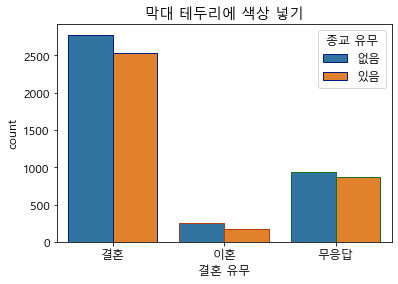

In [97]:
# 디자인 바꾸기

plt.figure()
plt.title('막대 테두리에 색상 넣기')
sns.countplot(x='결혼 유무', hue='종교 유무', data=welfare, order=ORDERING, linewidth=1, edgecolor=sns.color_palette("dark", 3))
# FileSave()  # 이미지 저장

<AxesSubplot:title={'center':'가로 막대로 그리기'}, xlabel='count', ylabel='결혼 유무'>

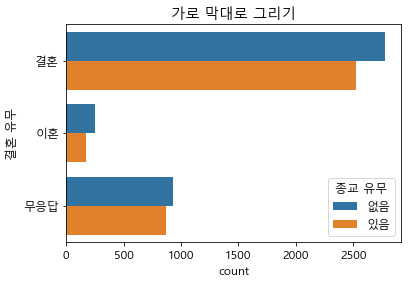

In [98]:
# 가로 막대 그리기

plt.figure()
plt.title('가로 막대로 그리기')
sns.countplot(y='결혼 유무', hue='종교 유무', data=welfare, order=ORDERING)
# FileSave() # 이미지 저장

<AxesSubplot:title={'center':'색상 팔레트 설정'}, xlabel='결혼 유무', ylabel='count'>

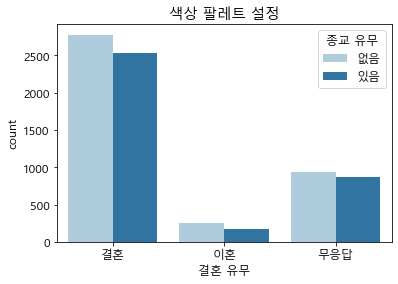

In [99]:
# 색상 팔레트 설정

plt.figure()
plt.title('색상 팔레트 설정')
sns.countplot(x='결혼 유무', hue='종교 유무', palette='Paired', data=welfare, order=ORDERING)
# FileSave() #이미지 저장

### 나이에 따른 히스토그램 (distplot)

- distplot 명령은 러그와 커널 밀도 표시 기능이 있어서 matplotlib의 hist 명령보다 많이 사용됨.
- matplotlib의 hist 그래프와 kdeplot을 통합한 그래프로 일변량 데이터에 사용됨.
- distplot() 함수는 데이터의 분포와 밀도를 확인 할 수 있음.
- 매개변수 \
  a : Series, 1d-array, list 등을 사용할수 있음. \
  bins : 계급의 개수를 지정. \
  hist : True 이면 히스토그램 그림. \
  kde : 히스토그램 보다 부드러운 형태의 분포 곡선을 보여주는 방법. True 이면 kde를 그림. \
  rug : True 이면 rugplot을 그림. \
  vertical : 기본 값은 False, True 이면 가로로 그래프를 그림. \
  color : 색상 지정

<AxesSubplot:title={'center':'rugplot과 kde'}, xlabel='나이', ylabel='Density'>

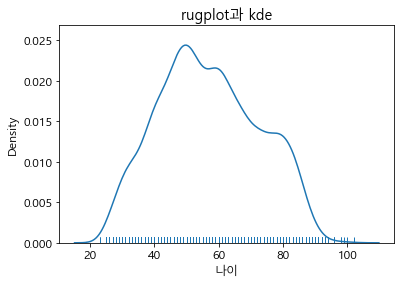

In [100]:
x = welfare['나이']

plt.figure()
plt.title('rugplot과 kde')
sns.distplot(x, rug=True, hist=False, kde=True)
# FileSave() # 이미지 저장

<AxesSubplot:title={'center':'kde와 histogram'}, xlabel='나이', ylabel='Density'>

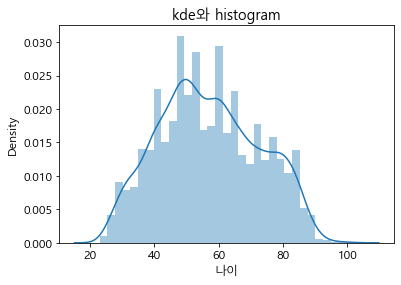

In [101]:
# kde(kernel density) 플롯

plt.figure() 
plt.title('kde와 histogram')
sns.distplot(x, rug=False, hist=True, kde=True, label='asdf')
# FileSave() # 이미지 저장

<AxesSubplot:title={'center':'가로로 표현하기'}, xlabel='Density', ylabel='나이'>

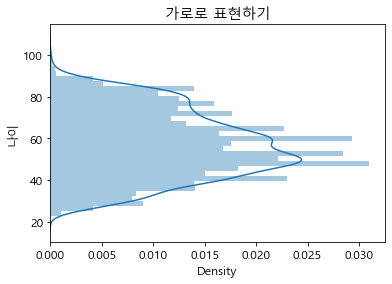

In [102]:
# 가로로 표현하기

plt.figure()
plt.title('가로로 표현하기')
sns.distplot(x, vertical=True)
# FileSave() # 이미지 저장

<AxesSubplot:title={'center':'컬러 바꾸기'}, xlabel='나이', ylabel='Density'>

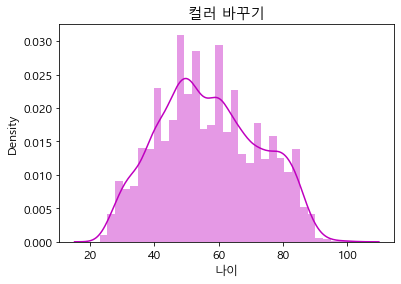

In [103]:
# 컬러 바꾸기

plt.figure()
plt.title('컬러 바꾸기')
sns.distplot(x, color="m")
# FileSave() # 이미지 저장

### 결혼 유무와 성별에 따른 히트맵 (heatmap)

- 데이터가 2차원이고 모든 값이 카테고리 값이면 heatmap 명령을 사용하면 좋음.
- 히트맵은 색상으로 표현된 행렬 정보를 이용하여 사각형의 그래프를 그려줌.
- 히트맵을 이용해도 2개의 카테고리 값에 의한 실수 값의 변화를 볼 수 있음.
- 매개변수 \
  data : 2차원 형식의 데이터 셋 \
  cmap : colormap 이름이나 색상을 담고 있는 list 자료 구조 사용.\
  annot : True 이면 cell에 해당하는 수치 값을 보여줌.

In [104]:
# 히트맵 함수 적용하기 전에 pivot table 기능
# index 에는 '성별', columns 에는 ' 결혼 유무'로 설정

pivot = welfare.pivot_table(index='성별', columns='결혼 유무', values='나이')
print('pivot_table을 이용한 시각화')
print(pivot)

pivot_table을 이용한 시각화
결혼 유무         결혼        무응답        이혼
성별                                   
남성     59.806978  43.629973  58.57767
여성     58.890179  53.913251  57.28169


<AxesSubplot:title={'center':'결혼 유무와 성별에 대한 히트맵'}, xlabel='결혼 유무', ylabel='성별'>

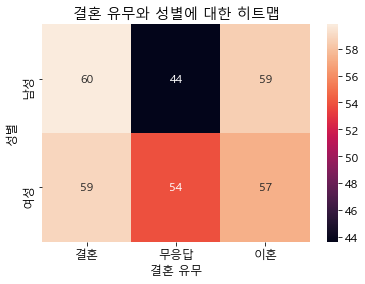

In [105]:
# 수치 데이터에 대하여 정수 값으로 반올림 수행

plt.figure()
plt.title('결혼 유무와 성별에 대한 히트맵')
sns.heatmap(data=pivot, annot=True)
# FileSave() # 이미지 저장

In [106]:
# correlation(상관관계)를 시각화
# corr() 함수는 데이터의 상관 관계를 보여줌.

cor = welfare.corr()
print('상관 관계 시각화')
print(cor)

상관 관계 시각화
             생일     직업 코드        소득        나이
생일     1.000000 -0.287829  0.093783 -1.000000
직업 코드 -0.287829  1.000000 -0.287414  0.287829
소득     0.093783 -0.287414  1.000000 -0.093783
나이    -1.000000  0.287829 -0.093783  1.000000


<AxesSubplot:title={'center':'상관 관계 시각화'}>

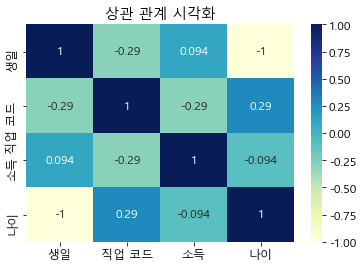

In [107]:
plt.figure()
plt.title('상관 관계 시각화')
sns.heatmap(data=cor, annot=True, cmap="YlGnBu")
# FileSave() # 이미지 저장

### 두 컬럼간의 짝 그래프 (pair plot)

- 3차원 이상의 다차원 실수형 데이터인 경우 pairplot 함수 사용.
- 데이터 셋들 중에서 각각 2개의 컬럼들간의 관계를 그래프로 그려주는 역할
- 데이터 프레임을 인수로 받아 그리드(grid) 형태로 각 데이터 열의 조합에 대해 산점도 그래프를 그림.
- 동일한 데이터가 만나는 대각선 영역에는 해당 데이터의 히스토그램 그림
- 매개변수 \
  data : 적용할 데이터 프레임 지정\
  hue : 특성을 구분할 컬럼 지정\
  palette : 팔레트를 지정\
  height : 각 facet의 높이를 inches로 지정\
  markers : 마킹될 도형의 모양을 지정

<Figure size 432x288 with 0 Axes>

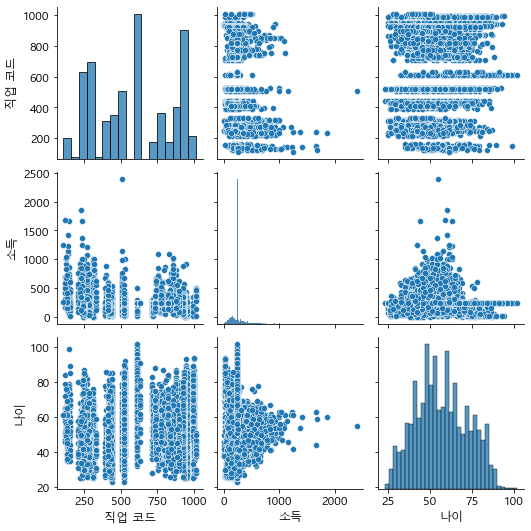

In [109]:
# 기본 pairplot

newwelfare = welfare.loc[:, ['직업 코드', '소득', '나이', '결혼 유무']]

plt.figure()
sns.pairplot(data=newwelfare)

# FileSave() # 이미지 저장

- 우측 하단의 '나이'에 대한 히스토그램을 살펴보면 대략 50대에서 60대의 사람이 많이 분포되어 있음 확인.
- 정중앙의 '소득'에 대한 히스토그램을 살펴보면 유독 큰 소득이 있는데, 이상치일 확률이 높음.

<Figure size 432x288 with 0 Axes>

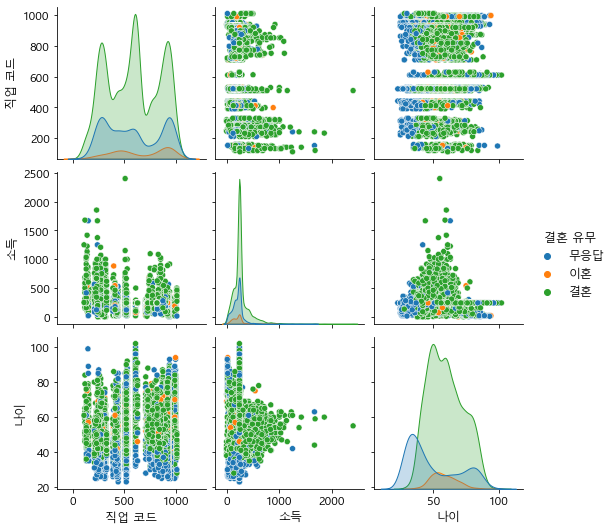

In [110]:
# 동일한 데이터에 대하여 '결혼 유무' 에 따흔 그래프를 그림.

plt.figure()
sns.pairplot(data=newwelfare, hue='결혼 유무')
# FileSave() # 이미지 저장

<Figure size 432x288 with 0 Axes>

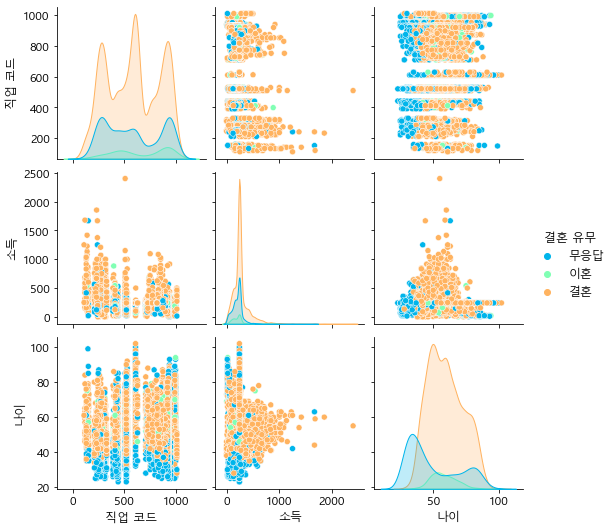

In [111]:
# 색상 지정

plt.figure()
sns.pairplot(data=newwelfare, hue='결혼 유무', palette="rainbow")
# FileSave() # 이미지 저장

<Figure size 432x288 with 0 Axes>

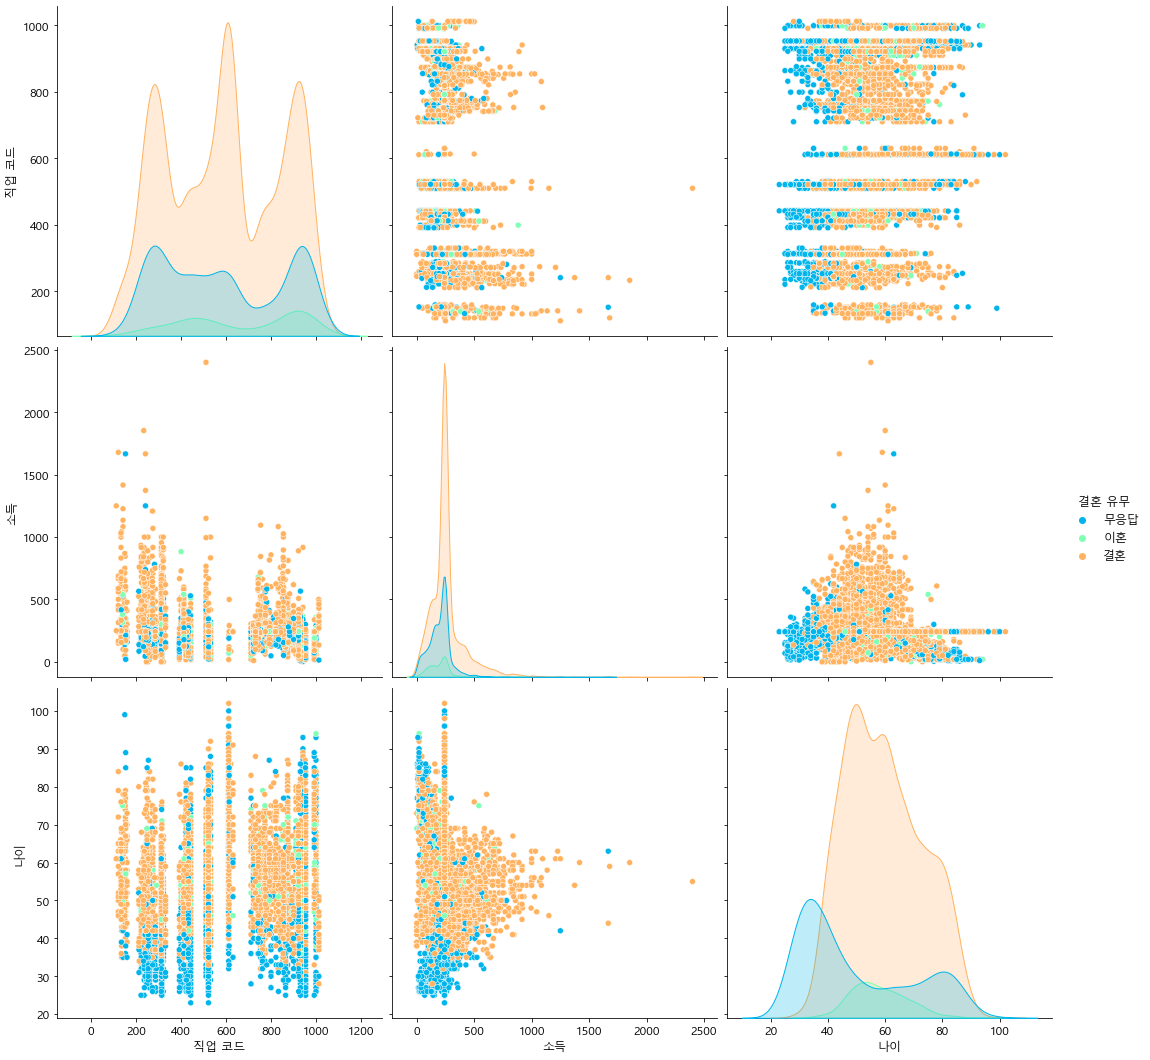

In [112]:
# 사이즈 적용

plt.figure()
sns.pairplot(data=newwelfare, hue='결혼 유무', palette="rainbow", height=5,)
# FileSave() # 이미지 저장

### 성별과 나이에 따른 바이올린 그래프 (violinplot)

- 바이올린처럼 생겼다고 붙여진 이름.
- KDE 플롯과 BOX 플롯을 서로 조합하여 그린 그래프
- 상자 수염 그래프와는 다르게 커널 밀도 추정치를 이용하여 그래프를 그림.
- 분포에 대한 결과를 보여주는 데는 효과적이나, 적은 샘플 사이즈를 이용하여 보여주는 경우 다소 오해의 소지가 있을 수 있음.
- 매개변수 \
  x : 그리고자 하는 컬럼을 명시 \
  data : 대상이 되는 데이터프레임 지정 \
  hue : 특성을 구분할 컬럼 지정 \
  palette : 색상 팔레트 지정

In [48]:
print("welfare['나이'].describe()")
print(welfare['나이'].describe())

welfare['나이'].describe()
count    7529.000000
mean       56.987913
std        15.524029
min        23.000000
25%        45.000000
50%        56.000000
75%        69.000000
max       102.000000
Name: 나이, dtype: float64


<AxesSubplot:title={'center':'나이에 대한 바이올린 그래프'}, xlabel='나이'>

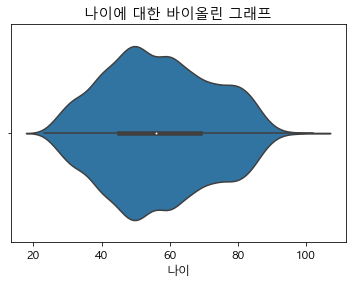

In [49]:
# '나이' 컬럼의 통계 정보를 이용한 바이올린 그래프

plt.figure()
plt.title('나이에 대한 바이올린 그래프')
sns.violinplot(x='나이', data=welfare)
# FileSave() # 이미지 저장

- 바이올린 그래프는 컬럼에 대한 데이터의 비교 분포도를 확인 가능. 
- 외부 곡선은 데이터의 분포를 나타냄.
- 약 50정도의 나이에 많은 데이터가 분포되어 있음.
- 양쪽 끝 뾰족한 부분은 데이터의 최소 값 23과 최대 값 102를 나타냄.
- 가운데 조그만 흰색 점은 중앙 값을 의미.
- 바이올린 중앙의 검정 색상의 두꺼운 선은 사분위 범위를 나타냄.
- 얇은 선은 95% 신뢰 구간을 나타냄.

<AxesSubplot:title={'center':'비교 분포 확인'}, xlabel='성별', ylabel='나이'>

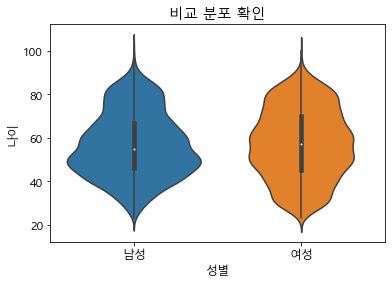

In [50]:
# x, y축을 지정해 줌으로써 바이올린을 분할하여 비교 분포를 볼 수 있음.

plt.figure()
plt.title('비교 분포 확인')
sns.violinplot(x='성별', y='나이', data=welfare)
# FileSave() # 이미지 저장

<AxesSubplot:title={'center':'가로형 violinplot'}, xlabel='나이', ylabel='성별'>

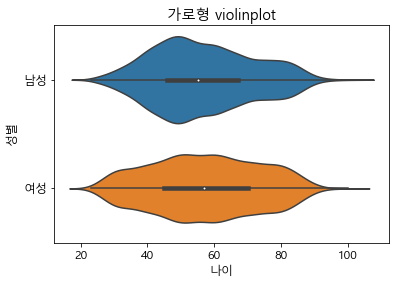

In [51]:
# 가로형 바이올린 플롯

plt.figure()
plt.title('가로형 violinplot')
sns.violinplot(y='성별', x='나이', data=welfare)
# FileSave() # 이미지 저장

<AxesSubplot:title={'center':'hue 옵션으로 분포 비교'}, xlabel='종교 유무', ylabel='나이'>

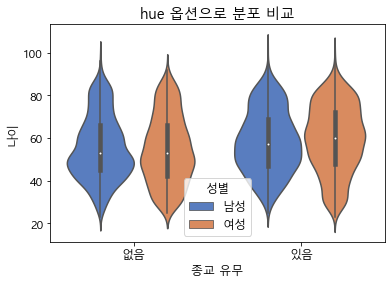

In [52]:
# hue 옵션으로 분포 비교

plt.figure()
plt.title('hue 옵션으로 분포 비교')
sns.violinplot(x='종교 유무', y='나이', hue='성별', data=welfare, palette="muted")
# FileSave() # 이미지 저장

### 선형 회귀 모델 그래프 (lmplot)

- linear model의 줄임말의 lm에 plot을 합친 단어.
- 선형 회귀 모델과 연관이 있는 함수로써 컬럼 간의 선형적인 관계를 확인하기에 용이한 차트
- 이상치 데이터도 같이 짐작 가능
- 매개변수 \
  x,y : x축과 y축에 그려질 데이터를 명시 \
  data : 사용할 데이터프레임 지정 \ 
  hue : 특성을 구분할 컬럼 지정 \
  height : 각 항목의 면(Facet)에 대한 높이를 inch 단위로 지정 \
  col = '성별' : 항목별 그래프를 별도로 그려볼 수 있음 \
  col_wrap = 숫자 : 한 줄에 표기할 컬럼의 개수를 명시하는 옵션 \
  scatter_kws : scatter 관련 keyword를 사전 형식으로 지정
  

<Figure size 432x288 with 0 Axes>

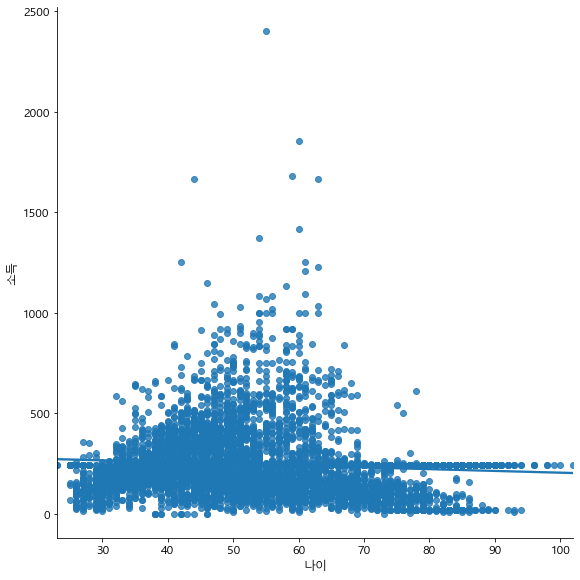

In [113]:
# 기본 lmplot

plt.figure()
sns.lmplot(x='나이', y='소득', height=8, data=welfare)
# FileSave() # 이미지 저장

<Figure size 432x288 with 0 Axes>

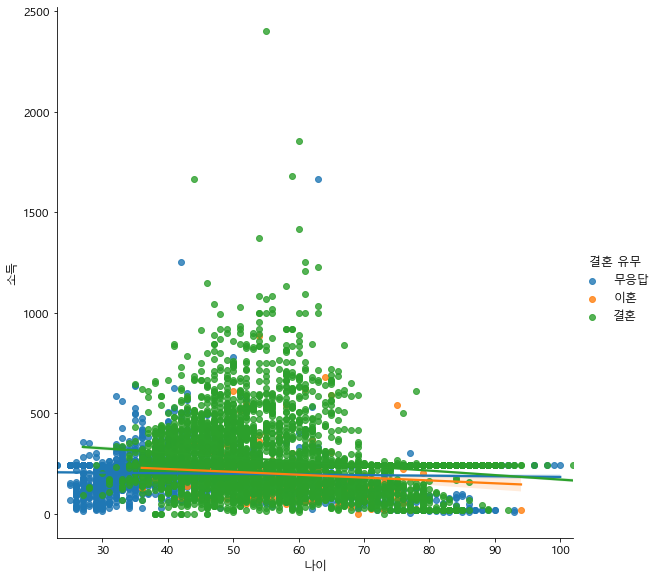

In [114]:
# hue 옵션으로 다중 선형관계 그리기

plt.figure()
sns.lmplot(x='나이', y='소득', hue='결혼 유무', height=8, data=welfare)
# FileSave() # 이미지 저장

- 위 그래프를 통하여 비흡연자가, 흡연자 대비 좀 더 가파른 선형관계를 가지는 것을 볼 수 있음.

<Figure size 432x288 with 0 Axes>

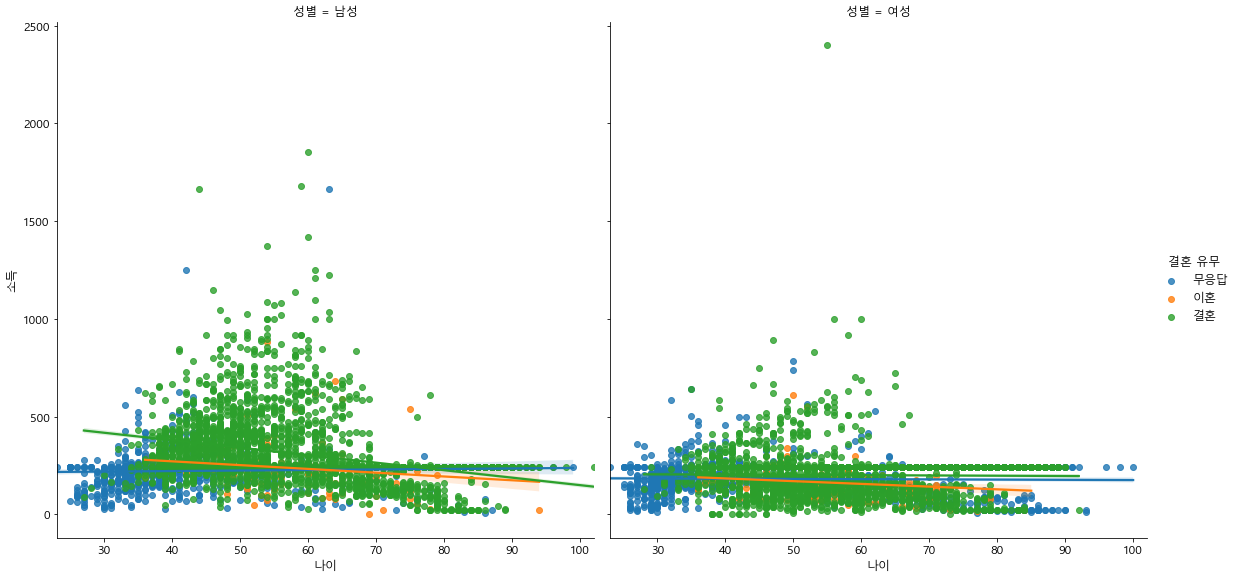

In [115]:
# col 옵션을 추가하여 그래프를 별도로 그려볼 수 있음

plt.figure()
sns.lmplot(x='나이', y='소득', hue='결혼 유무', col='성별', col_wrap=2, height=8, data=welfare)
# FileSave() # 이미지 저장

- col_wrap으로 한 줄에 표기할 column의 갯수를 명시할 수 있음.

### 나이와 소득에 따른 산점도 (replot)

- 두 컬럼간 상관관계를 보여주지만 lmplot 처럼 선형 관계를 따로 그려주지는 않음.

<Figure size 432x288 with 0 Axes>

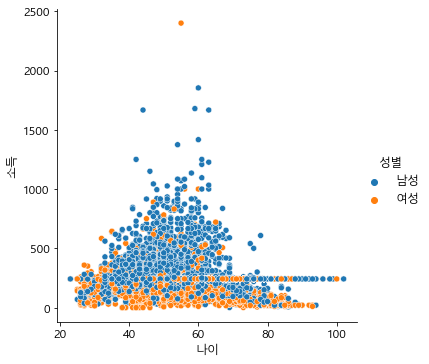

In [116]:
# 기본 replot 

plt.figure()
sns.relplot(x='나이', y='소득', hue='성별', data=welfare)
# FileSave() # 이미지 저장

<Figure size 432x288 with 0 Axes>

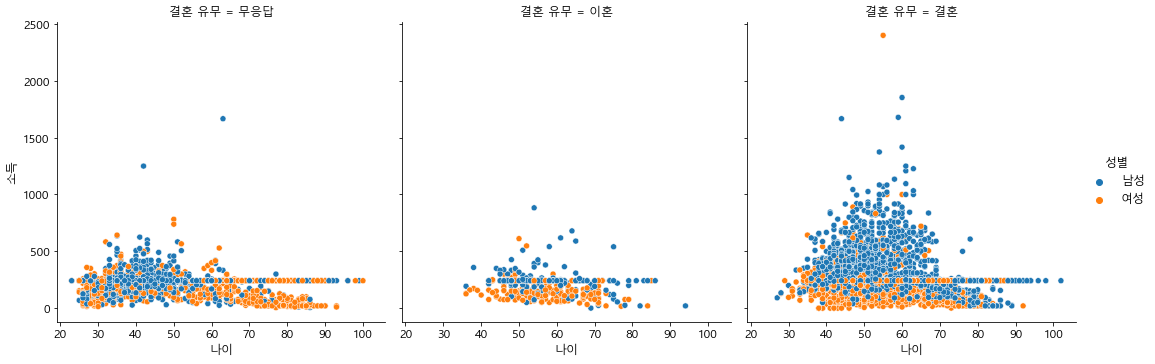

In [117]:
# '결혼 유무'라는 범주형 데이터 개수 만큼 데이터를 별도로 그림

plt.figure()
sns.relplot(x='나이', y='소득', hue='성별', col='결혼 유무', data=welfare)
# FileSave() # 이미지 저장

<Figure size 432x288 with 0 Axes>

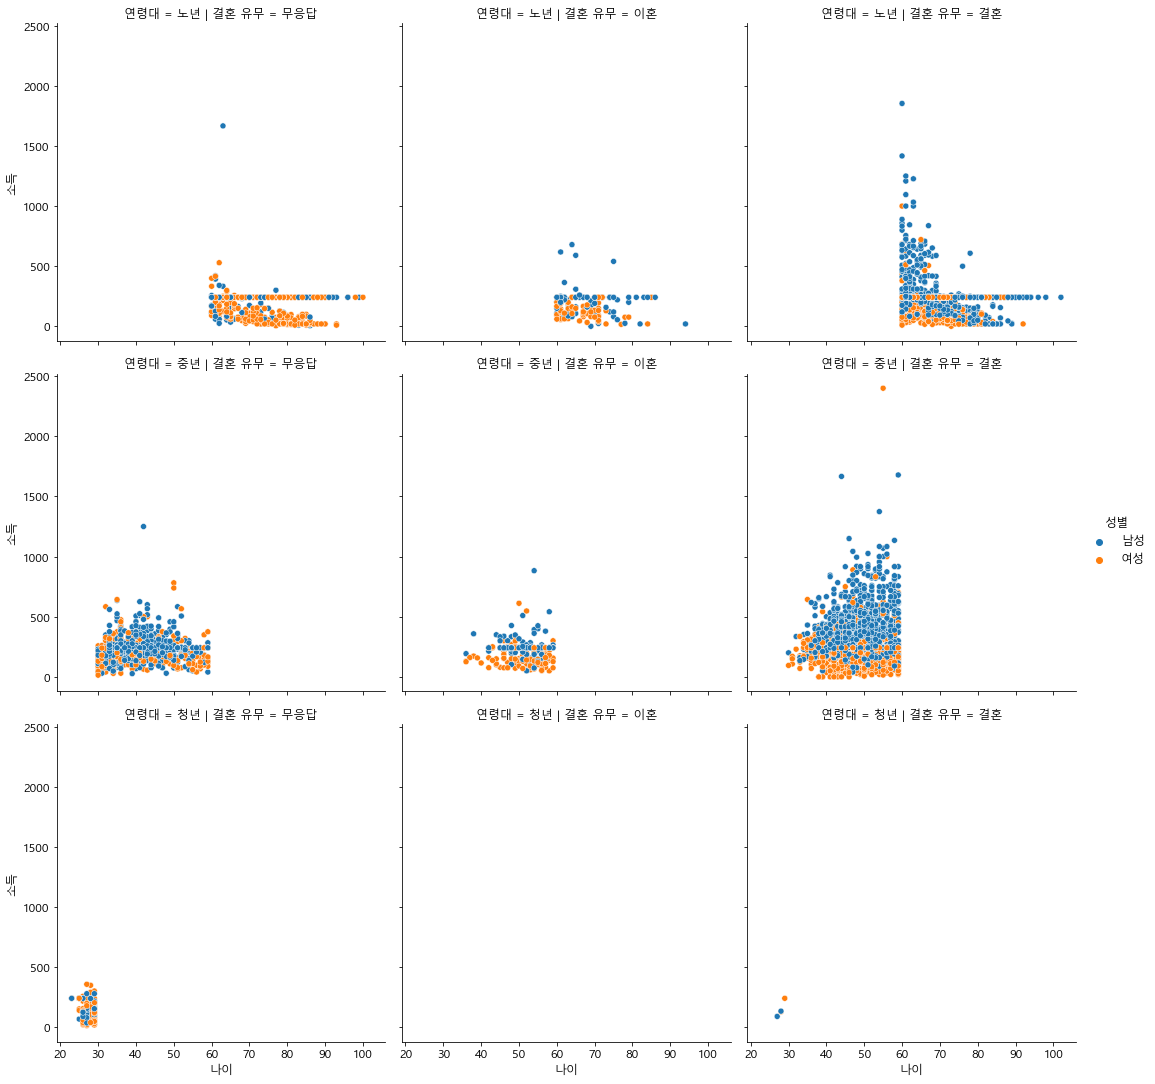

In [118]:
# row와 column에 표기할 데이터 column 선택

plt.figure()
sns.relplot(x='나이', y='소득', hue='성별', row='연령대', col='결혼 유무', data=welfare)
# FileSave() # 이미지 저장

<Figure size 432x288 with 0 Axes>

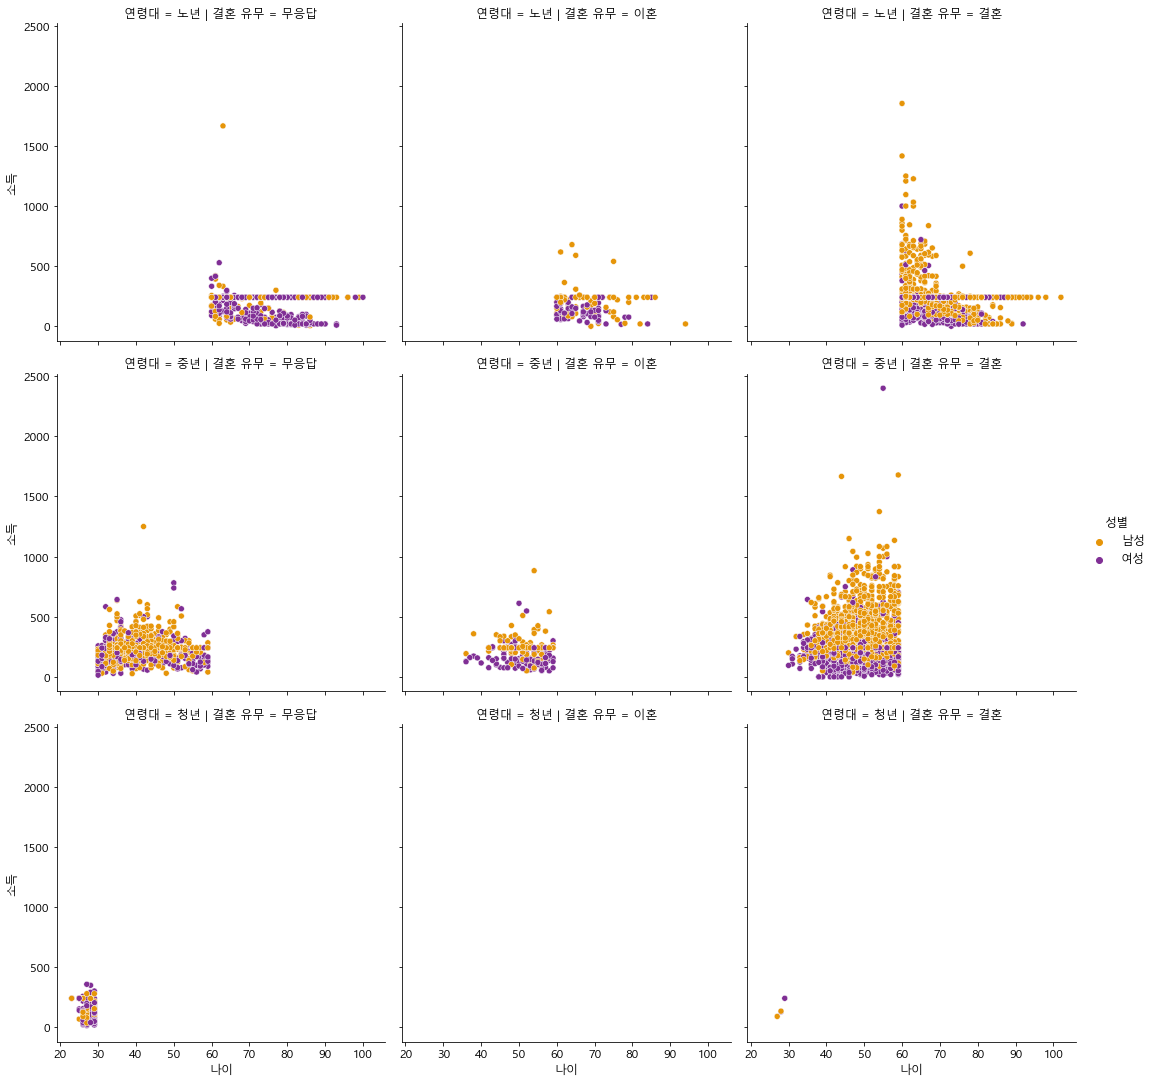

In [119]:
# 색상 지정

plt.figure()
sns.relplot(x='나이', y='소득', hue='성별', row='연령대', col='결혼 유무', palette='CMRmap_r', data=welfare)
# FileSave() # 이미지 저장

### 나이와 소득에 따른 산점도와 히스토그램 (jointplot)

- 중앙에 산점도 그래프를 차트의 가장 자리(margin)에 히스토그램을 동시에 그려주는 함수
- jointplot 함수는 숫자형 데이터만 표현 가능
- 매개변수 \
  kind : 차트의 종류 지정

<Figure size 432x288 with 0 Axes>

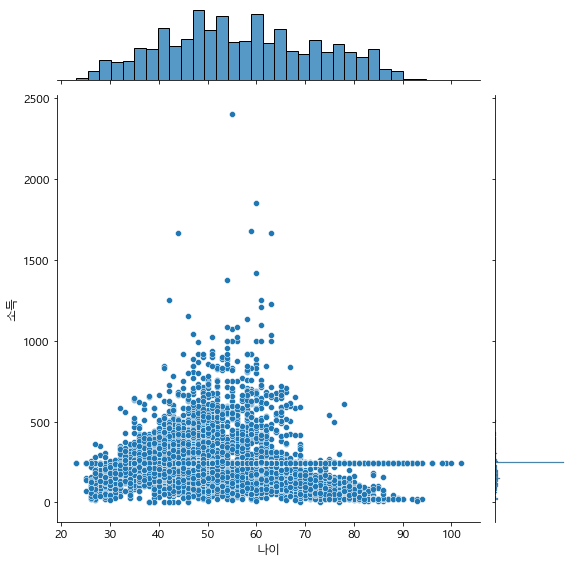

In [120]:
# 기본 jointplot

plt.figure()
sns.jointplot(x='나이', y='소득', height=8, data=welfare)
# FileSave() # 이미지 저장

<Figure size 432x288 with 0 Axes>

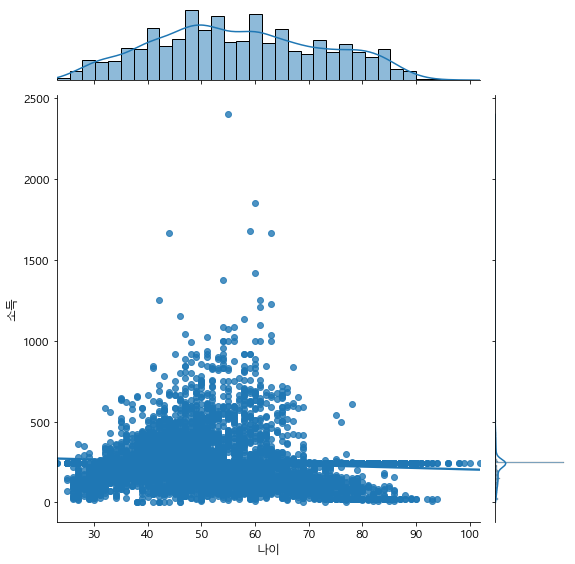

In [121]:
#선형 관계를 위한 회귀선(regression line)은 kind='reg'을 사용.

plt.figure()
sns.jointplot(x='나이', y='소득', height=8, data=welfare, kind="reg")
# FileSave() # 이미지 저장

seabornWelfare_03.png 파일이 저장되었습니다.


<Figure size 432x288 with 0 Axes>

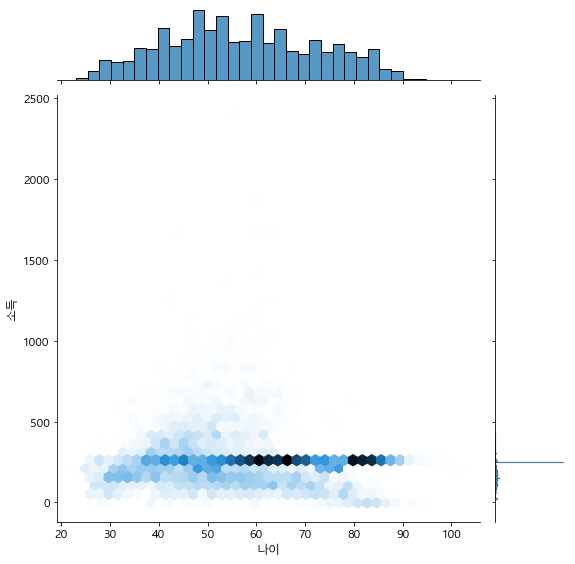

In [122]:
plt.figure()
sns.jointplot(x='나이', y='소득', height=8, data=welfare, kind="hex")
FileSave()# FileSave() # 이미지 저장

<Figure size 432x288 with 0 Axes>

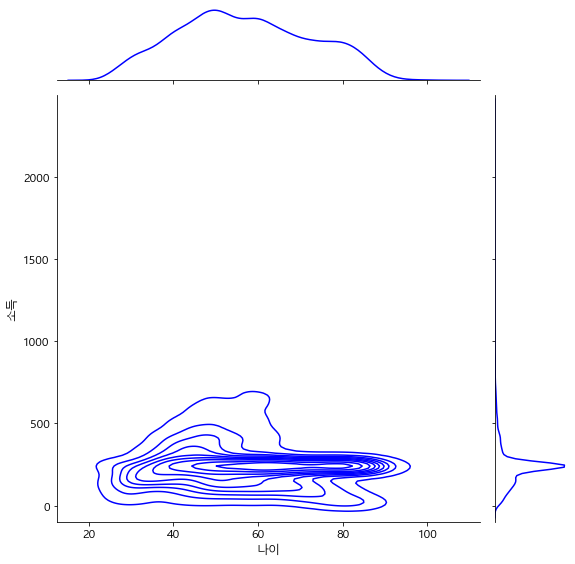

In [123]:
# 등고선 모양으로 밀집도 확인하기
# kind='kde' 옵션으로 데이터의 밀집도를 보다 부드러운 선으로 확인할 수 있음.

plt.figure()
sns.jointplot(x='나이', y='소득', height=8, data=welfare, kind="kde", color="b")
# FileSave() # 이미지 저장

### 성별에 따른 소득 그래프 (barplot)

- 막대그래프를 그려주는 함수
- 매개 변수 \
  x,y : x축에 놓여질 범주형 데이터, y축에는 연속형 데이터를 지정 \
  data : 적용할 데이터 프레임을 지정 \
  hue : 특성을 구분할 컬럼 지정 \
  errwidth : 에러 바의 두께를 지정 \
  estimator : 기본 값은 평균

In [66]:
print(welfare[['소득', '나이']].describe())

                소득           나이
count  7529.000000  7529.000000
mean    241.619016    56.987913
std     144.679991    15.524029
min       0.000000    23.000000
25%     162.600000    45.000000
50%     241.619016    56.000000
75%     241.619016    69.000000
max    2400.000000   102.000000


Text(0, 0.5, '소득')

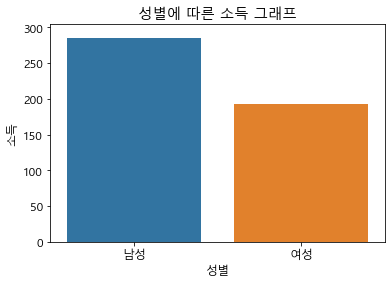

In [67]:
# x축 : 성별 , y축 : 소득 에 대한 평균 값을 이용한 일변량 막대 그래프
ax = plt.subplots()
ax = sns.barplot(x='성별', y='소득', data=welfare, errwidth=0)
ax.set_title('성별에 따른 소득 그래프')
ax.set_xlabel('성별')
ax.set_ylabel('소득')
# FileSave() # 이미지 저장

Text(0, 0.5, '소득')

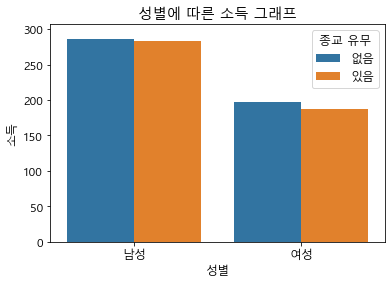

In [68]:
# '종교 유무' 에 따른 색상 구분을 하고, 다변량 막대그래프를 보여줌

ax = plt.subplots()
ax = sns.barplot(x='성별', y='소득', hue='종교 유무', data=welfare, errwidth=0)
ax.set_title('성별에 따른 소득 그래프')
ax.set_xlabel('성별')
ax.set_ylabel('소득')
# FileSave() # 이미지 저장

Text(0.5, 0, '소득')

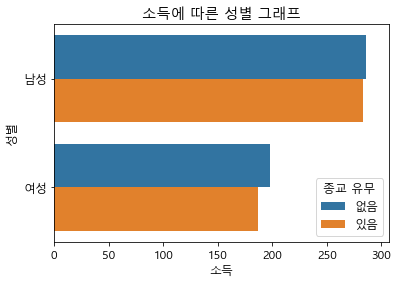

In [69]:
# 가로 막대 그래프

ax = plt.subplots()
ax = sns.barplot(x='소득', y='성별', hue='종교 유무', data=welfare, errwidth=0)
ax.set_title('소득에 따른 성별 그래프')
ax.set_ylabel('성별')
ax.set_xlabel('소득')
# FileSave() # 이미지 저장

### 성별에 따른 소득 상자 수염 그래프 (boxplot)

Text(0, 0.5, '소득')

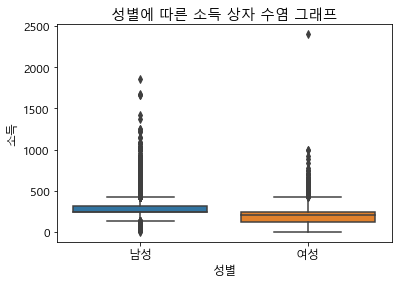

In [70]:
ax = plt.subplots()
ax = sns.boxplot(x='성별', y='소득', data=welfare)
ax.set_title('성별에 따른 소득 상자 수염 그래프')
ax.set_xlabel('성별')
ax.set_ylabel('소득')
# FileSave() # 이미지 저장

Text(0, 0.5, '소득')

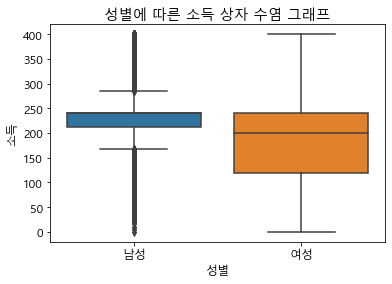

In [71]:
# 이상치 정보가 위의 그래프에 많은 관계로 이상치를 제거하고 다시 그림. 소득이 400 이하인 행에 대하여 그림.

newwelfare = welfare.loc[ welfare['소득'] <= 400 ]
ax = plt.subplots()
ax = sns.boxplot(x='성별', y='소득', data=newwelfare)
ax.set_title('성별에 따른 소득 상자 수염 그래프')
ax.set_xlabel('성별')
ax.set_ylabel('소득')
# FileSave() # 이미지 저장

### 소득에 따른 나이 (이차원 밀집도 kdeplot)

- kdeplot은 kernel density estimation의 줄인 말
- 이 함수는 히스토그램 같은 데이터 분포를 smoothing하여 그려주는 기법
- 확률 밀도를 추정하여 일종의 discrete(이산화)되어 있는 변수를 연속적으로 만들어주는 것.
- 매개변수 \
  data : x축에 그려질 데이터 지정 \ 
  data2 : y축에 그려질 데이터 지정 \
  shade : True 값을 가지면 그림자 효과를 지정 \
  color : 색상 지정 \ 
  label : 레이블 지정 \
  alpha : 불투명도 지정


Text(0, 0.5, '나이')

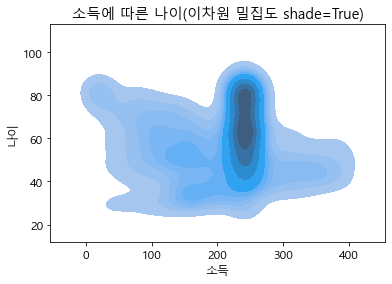

In [72]:
# 소득에 따른 나이(이차원 밀집도

kde, ax = plt.subplots()
ax = sns.kdeplot(x=newwelfare['소득'],
                 y=newwelfare['나이'],
                 fill=True)  
ax.set_title('소득에 따른 나이 이차원 밀집도')
ax.set_xlabel('소득')
ax.set_ylabel('나이')
# FileSave() # 이미지 저장

seabornWelfare_04.png 파일이 저장되었습니다.
finished


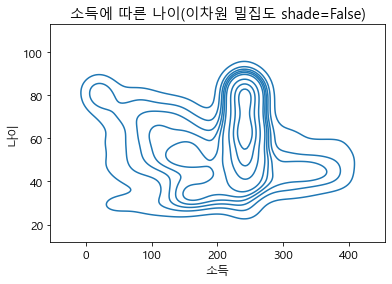

In [74]:
kde, ax = plt.subplots()
ax = sns.kdeplot(x=newwelfare['소득'],
                 y=newwelfare['나이'])  
ax.set_title('소득에 따른 나이 이차원 밀집도')
ax.set_xlabel('소득')
ax.set_ylabel('나이')
# FileSave() # 이미지 저장

print('finished')